In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

mapping_dict = np.load("dataset/mapping_fileB1+B2.npy", allow_pickle=True).item()
print(mapping_dict)
feature_data = []  # Feature list
label_list = []    # Firmness list
plot_oi=[]

keys = list(mapping_dict.keys())
print(f"Keys from mapping_dict: {keys[:5]}")  # Debug: Print first 5 keys

label_list=list(mapping_dict.values())
print(label_list)

{'RS20240205125747_P19100983.xlsx': 32.2687, 'RS20240205125849_P19100983.xlsx': 32.2687, 'RS20240205130001_P19100983.xlsx': 32.2687, 'RS20240205130054_P19100983.xlsx': 32.2687, 'RS20240205130211_P19100983.xlsx': 32.2687, 'RS20240205130308_P19100983.xlsx': 32.2687, 'RS20240205130405_P19100983.xlsx': 32.2687, 'RS20240205130458_P19100983.xlsx': 32.2687, 'RS20240205130603_P19100983.xlsx': 32.2687, 'RS20240205130708_P19100983.xlsx': 32.2687, 'RS20240205130805_P19100983.xlsx': 32.2687, 'RS20240205130910_P19100983.xlsx': 32.2687, 'RS20240205131007_P19100983.xlsx': 32.2687, 'RS20240205131102_P19100983.xlsx': 32.2687, 'RS20240205131155_P19100983.xlsx': 32.2687, 'RS20240205131248_P19100983.xlsx': 32.2687, 'RS20240205131338_P19100983.xlsx': 32.2687, 'RS20240205131439_P19100983.xlsx': 32.2687, 'RS20240205131541_P19100983.xlsx': 32.2687, 'RS20240205131639_P19100983.xlsx': 32.2687, 'RS20240205131820_P19100983.xlsx': 39.0408, 'RS20240205131914_P19100983.xlsx': 39.0408, 'RS20240205132004_P19100983.xls

In [2]:
csv_dir = "dataset/data/B1+B2xlsx/"
if not os.path.exists(csv_dir):
    raise FileNotFoundError(f"Directory {csv_dir} does not exist.")
z=0
for filename in os.listdir(csv_dir):
    file_key = os.path.splitext(filename)[0]
    if file_key + ".xlsx" in keys:  # Ensure extension matches keys
        file_path = os.path.join(csv_dir, filename)
        #print(file_path)
        df = pd.read_excel(file_path,header=None)  # Use read_excel for .xlsx files
        features = df.iloc[:, 2].values  # Ensure column index is correct
        # features variable has all the values of the 3rd column i.e y
        #z+=1
        plot_ing = df.iloc[:,1]
        #print(len(features),z)#prints 512 2773 times
        feature_data.append(features)
        plot_oi.append(plot_ing)
        #print(feature_data[0])
        #feature data is an arrray where every element is the features i.e the 3rd row of every file
columns = [f"Column {i+1}" for i in range(512)]
df_x = pd.DataFrame(feature_data, columns=columns)
df_plot = pd.DataFrame(plot_oi)
#print(df_x.head())#prints [5 rows x 512 columns] values

In [7]:
print(df_x.iloc[0])  # Access the first row


Column 1      1841.7994
Column 2       764.2142
Column 3       848.6290
Column 4      1089.0439
Column 5      1363.4587
                ...    
Column 508     957.6189
Column 509    1387.3230
Column 510    1113.0242
Column 511    1195.7253
Column 512    1331.4275
Name: 0, Length: 512, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


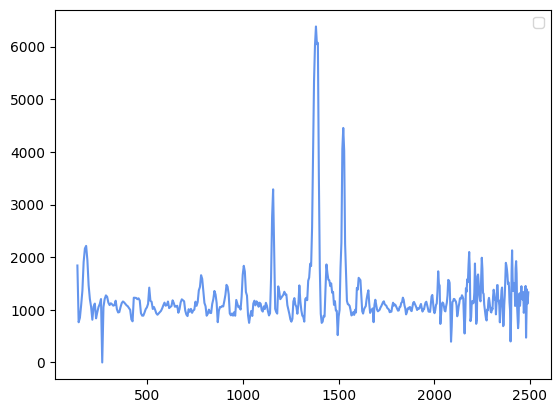

In [ ]:
for i in range(0,2774):
    plt.plot(df_plot.iloc[i], df_x.iloc[i], color='cornflowerblue') 
    plt.legend() 
    plt.show() 